In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train_house = pd.read_csv('train.csv')

In [3]:
df_train_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
categorical_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley',
                       'LotShape', 'LandContour','Utilities', 'LotConfig',
                       'LandSlope', 'Neighborhood', 'Condition1', 
                       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
                       'OverallCond', 'RoofStyle', 'RoofMatl','Exterior2nd',
                       'MasVnrType','ExterQual', 'ExterCond', 'Foundation',
                       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                       'Electrical','KitchenQual' ,'Functional', 'FireplaceQu',
                       'GarageType','GarageFinish','GarageQual','GarageCond',
                       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                       'SaleType', 'SaleCondition', 'Exterior1st' ]

In [5]:
for categorical_feature in categorical_features:
    df_train_house[categorical_feature] = df_train_house[categorical_feature].astype('category')    

Changed all the categorical features datatype into categorical datatype

In [6]:
numerical_features = []
for i in df_train_house.columns:
    if i not in categorical_features and i != 'Id' and i != 'SalePrice':
        numerical_features.append(i)

In [7]:
numerical_features

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

Need to check for Outliers, reduce the dimension with PCA and VAT algorithms first before proceeding


## Investigate SalePrice Column

In [8]:
df_train_house['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


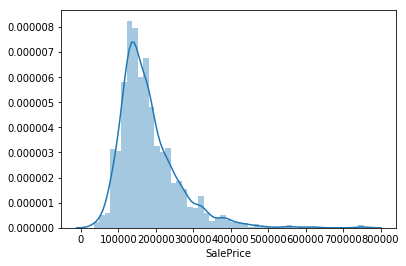

In [9]:
sns.distplot(df_train_house['SalePrice']);

In [10]:
#skewness and kurtosis
print("Skewness: %f" % df_train_house['SalePrice'].skew())
print("Kurtosis: %f" % df_train_house['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Skewness : Kurtosis : 

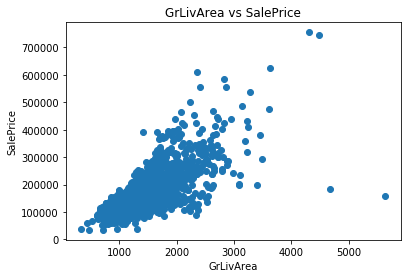

In [11]:
plt.scatter(x = df_train_house['GrLivArea'], y = df_train_house['SalePrice']);
plt.xlabel("GrLivArea");
plt.ylabel("SalePrice");
plt.title("GrLivArea vs SalePrice");

It could be observed that there is a linear relationship between GrLivArea and SalePrice

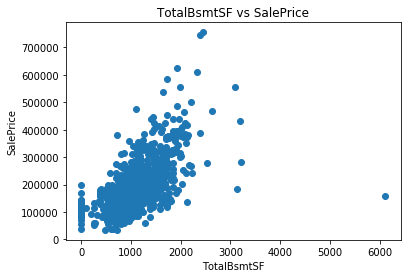

In [12]:
plt.scatter(x = df_train_house['TotalBsmtSF'], y = df_train_house['SalePrice']);
plt.xlabel("TotalBsmtSF");
plt.ylabel("SalePrice");
plt.title("TotalBsmtSF vs SalePrice");

It could be observed that there is a strong linear relationship between TotalBsmtSF vs Sale Price

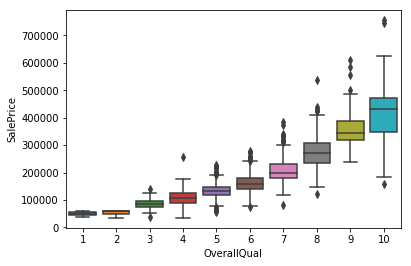

In [13]:
sns.boxplot(x = df_train_house['OverallQual'], y = df_train_house['SalePrice']);

### Summary of Data Exploration

- The higher the Overall Quality, the higher the SalePrice. Much more investigation must be done in order to understand the metrics of overall quality and how it was quantified
- The larger the Grid Live Area, the higher the Sale Price. 
- The larger the TotalBasement, the higher the Sale Price

### Correlation Matrix

 Actually, this correlation is so strong that it can indicate a situation of multicollinearity

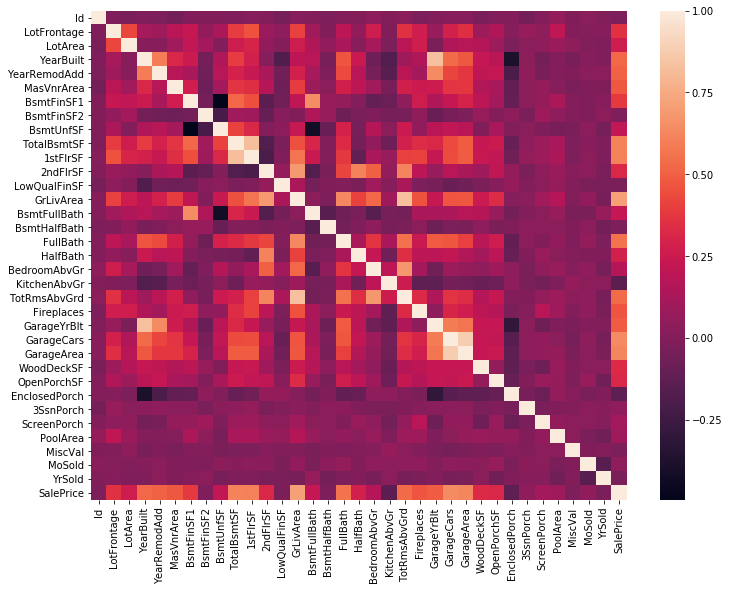

In [14]:
f ,ax = plt.subplots(figsize= (12,9))
sns.heatmap(df_train_house.corr());

## Sales Price Correlation

### Observation 

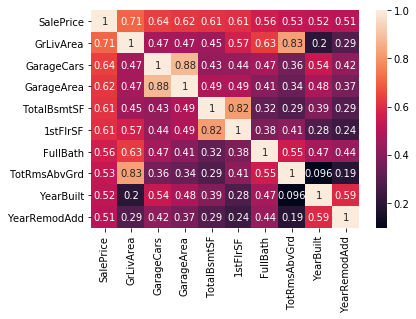

In [15]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = df_train_house.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train_house[cols].values.T)
hm = sns.heatmap(cm,annot=True, yticklabels=cols.values, xticklabels=cols.values)

- 'GarageCars' and 'GarageArea' are strongly correlated
- 'TotalBsmtSF' and '1stFlrSF' are strongly correlated
- 'GridLivArea' and 'TotalRmsAbvGrd' are strongly correlated

In [16]:
df_train_house.corr().nlargest(k, 'SalePrice')['SalePrice']

SalePrice       1.000000
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

The only variable that has a strong correlation with SalePrice is 'GrLivArea'

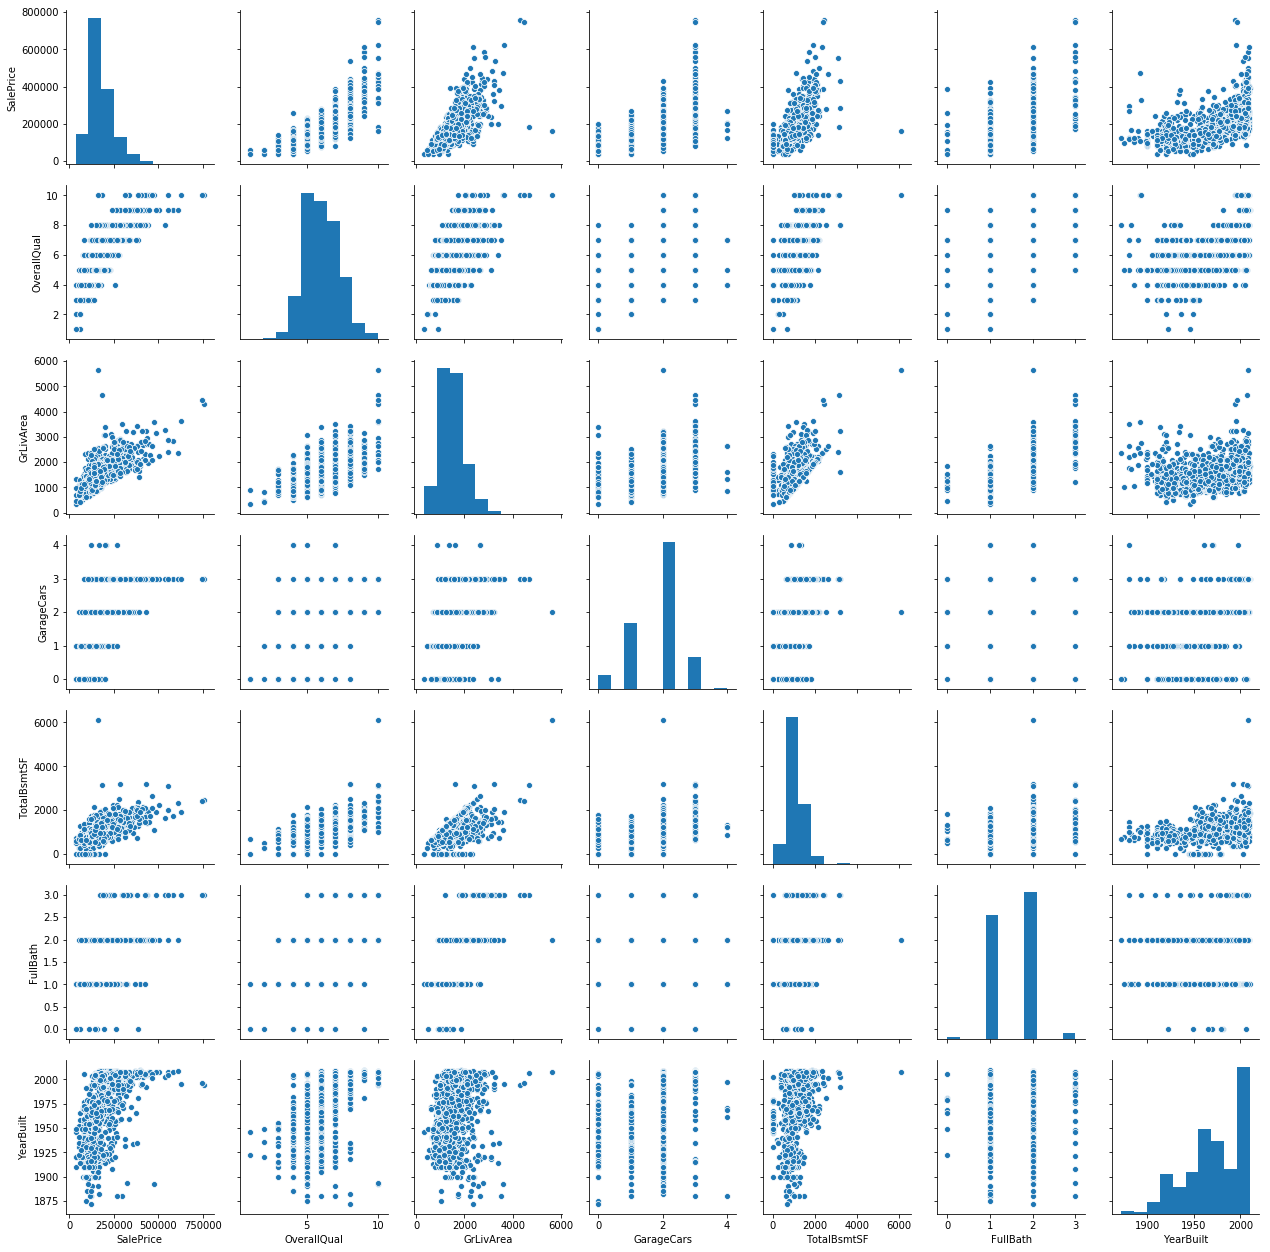

In [17]:
#Scatterplot
strong_corr = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train_house[strong_corr]);

Finding Missing Data

In [18]:
total_miss = df_train_house.isnull().sum().sort_values(ascending = False)
percent = (df_train_house.isnull().sum() / df_train_house.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total_miss, percent], axis = 1, keys = ['Total Missing Data', 'Percentage of Missing Data'])
missing_data.head()

,Total Missing Data,Percentage of Missing Data
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603


We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed

## Outliers


#Remove Outliers
df_train_house = df_train_house.drop(
                df_train_house[(df_train_house['GrLivArea']>4000) &
                              (df_train_house['SalePrice']<300000)].index)

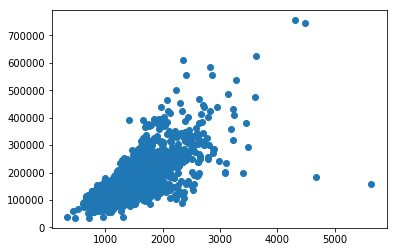

In [19]:
plt.scatter(df_train_house['GrLivArea'], df_train_house['SalePrice'])

Outliers removal is note always safe. We decided to delete these two as they are very huge and really bad ( extremely large areas for very low prices).



Target Variable

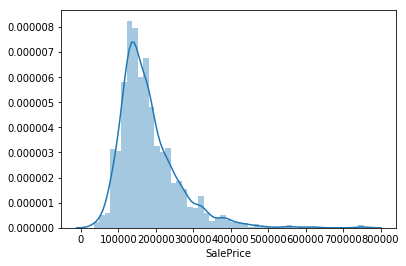

In [20]:
sns.distplot(df_train_house['SalePrice']);

Log-Transformation of the Target Variable : to tranform the variable to make it more normally distributed

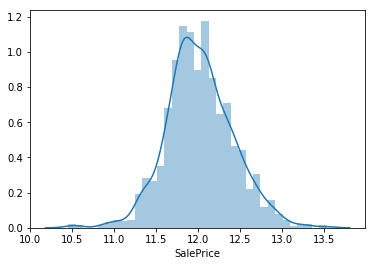

In [21]:
df_train_house['SalePrice'] = np.log1p(df_train_house['SalePrice'])

#Plot the transformed Distribtution
sns.distplot(df_train_house['SalePrice']);

Feature Engineering


In [22]:
y_train = df_train_house['SalePrice']
df_train_house.drop(['Id', 'SalePrice'], axis = 1, inplace = True)

In [23]:
df_train_house.drop(categorical_features, axis = 1, inplace = True)

In [24]:
#Drop Missing Data
df_train_house.fillna(0, inplace = True)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
regression = LinearRegression()
model = regression.fit(df_train_house, y_train)

In [27]:
df_test_house = pd.read_csv('test.csv')
df_test_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [28]:
df_test_house.drop(categorical_features, axis = 1, inplace = True)

In [29]:
df_test_house.drop(['Id'], axis = 1, inplace = True)
df_test_house.fillna(0, inplace = True)

In [38]:
y_train.drop(y_train.index[1459], inplace = True)

In [40]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(df_test_house)
mean_squared_error(y_train, y_pred)

0.281606942656489

Submission


sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)